##### Student information:
- Name: Tuan Anh NGUYEN
- Email: tuan.nguyen@etu.univ-cotedazur.fr

---

# Spotify project

The data this week comes from Spotify via the [`spotifyr` package](https://www.rcharlie.com/spotifyr/). [Charlie Thompson](https://twitter.com/_RCharlie), [Josiah Parry](https://twitter.com/JosiahParry), Donal Phipps, and Tom Wolff authored this package to make it easier to get either your own data or general metadata arounds songs from Spotify's API.

## Data description

|variable                 |class     |description |
|:---|:---|:-----------|
|track_id                 |character | Song unique ID|
|track_name               |character | Song Name|
|track_artist             |character | Song Artist|
|track_popularity         |double    | Song Popularity (0-100) where higher is better |
|track_album_id           |character | Album unique ID|
|track_album_name         |character | Song album name |
|track_album_release_date |character | Date when album released |
|playlist_name            |character | Name of playlist |
|playlist_id              |character | Playlist ID|
|playlist_genre           |character | Playlist genre |
|playlist_subgenre        |character | Playlist subgenre|
|danceability             |double    | Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. |
|energy                   |double    | Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy. |
|key                      |double    | The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1. |
|loudness                 |double    | The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.|
|mode                     |double    | Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.|
|speechiness              |double    | Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks. |
|acousticness             |double    | A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.|
|instrumentalness         |double    | Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. |
|liveness                 |double    | Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live. |
|valence                  |double    | A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry). |
|tempo                    |double    | The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. |
|duration_ms              |double    | Duration of song in milliseconds |


## Imports

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dateutil.parser as dparser
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.decomposition import PCA

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, VotingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

from sklearn.metrics.pairwise import cosine_similarity

## Data loading

In [113]:
TRAIN = pd.read_csv("spotify_songs_train.csv")
TRAIN.head()
# TRAIN.info()
# print("Shape", TRAIN.shape)
# TRAIN.describe()

,Unnamed: 0,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,21973,0Xw5Jg9aFglPqfH163thrA,Tell Me,Krept & Konan,40,2p93gdjjBJo51WF4YV3L3d,Tell Me,2019-10-31,Chixtape 5 - Tory Lanez,0UXwwVDipbBQeEX7h4YuKU,...,1,-5.760,0,0.3860,0.1360,0.000,0.0890,0.633,163.563,215047
1,16980,5A1ttHJNuGEoPLhhoHpzFA,Pearls,Epifania,40,0H7yNFgaPSzmji4ts1s3EN,"Gems from Japan, Vol II",2019-07-09,Sunny Beats,37i9dQZF1DXbtuVQL4zoey,...,0,-7.782,0,0.4530,0.3880,0.647,0.0799,0.677,85.054,83294
2,18464,3QHMxEOAGD51PDlbFPHLyJ,Vivir Mi Vida,Marc Anthony,75,6vBpLg3T8bojcqzoKI6m0R,3.0,2013-07-23,Fiesta Latina Mix 🎈🎉💃🏻🕺🏻☀️🏖,2kY6lVc5EcVfI5WNKmPQQG,...,0,-3.230,0,0.0344,0.3440,0.000,0.3490,0.893,105.017,252347
3,2992,48bSfSZaq9Aizbu4AWn4st,Febreze (feat. 2 Chainz),Jack Ü,57,6bfkwBrGYKJFk6Z4QVyjxd,Skrillex and Diplo present Jack Ü,2015-02-24,ELECTROPOP🐹,44p8nNLe4fGfUeArS3MaIX,...,2,-3.510,1,0.3330,0.0184,0.000,0.2890,0.263,149.829,214400
4,16751,2kJIiIqbzYVtv2iTpbQts9,As Far as Feelings Go,Alle Farben,66,7wN2FvcizhjkzuT3MvAGZI,As Far as Feelings Go,2019-10-11,Tropical House 🏝 2020 Hits,2SRbIs0eBQwHeTP7kErjwo,...,0,-4.399,0,0.0788,0.1060,0.000,0.1910,0.596,105.948,210827


In [114]:
TEST = pd.read_csv("spotify_songs_X_test.csv")
TEST.head()

,Unnamed: 0,track_id,track_name,track_artist,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,3578,0u6CqsKqlArqFuMVKREXp9,Never Can Say Goodbye,The Communards,5JYaoYQ7d8twJ2gp6kPt6C,Red,1987,80's Songs | Top 💯 80s Music Hits,65HtIbyFkaQPflCa4oW8KO,pop,...,5,-6.931,1,0.0287,0.04340,0.027300,0.2860,0.836,132.172,285986
1,26568,5IXV375WDokSNjZfR4GgnU,Love Is The Answer,Aloe Blacc,14JRI2yc9nKosojndoQxTv,Lift Your Spirit,2014-01-01,Soul Coffee (The Best Neo-Soul Mixtape ever),16iNEskDatG5KbDV16F6LR,r&b,...,9,-5.728,0,0.0863,0.03340,0.000000,0.0776,0.816,105.232,224867
2,14306,0sId1fkKRfPlyMMOSVShng,What's on Your Mind (Pure Energy),Information Society,3bv0NUg3BXwT5Uh4PW4zUD,Information Society,1988-06-21,Permanent Wave CHDB,2foj4ZYVHRGqSd1aMqNPBj,rock,...,0,-11.217,1,0.0560,0.00665,0.023800,0.2090,0.753,118.221,275533
3,9452,5BBVTlHaSDBJ0Wc25p9yCB,Рванарана,Litvinenko,2pJdHL7gUQr3uhqWOnZQ1x,Рванарана,2018-07-23,RUSSIAN Gangster Rap,0Jw0HckkxCfIrOvpN081eV,rap,...,6,-5.408,1,0.0558,0.74600,0.000000,0.0606,0.301,79.953,225789
4,25156,7vQNFiycXSGpgGgTxmaWjS,So Lo,Louis Baker,1pDf6t6lK8BQ9C7yhaPCah,So Lo,2019-05-31,I Love My Neo-Soul,37i9dQZF1DX44dZ4p5QLf4,r&b,...,3,-7.025,0,0.0480,0.43400,0.000002,0.1080,0.832,89.008,231640


## Your task

* All the data comes from spotify

* Task 1: Predict ’popularity’ with a Machine Learning model and with a Deep Learning model 
    * 13 points - for Machine Learning model, you can use all model learned in lecture.
    * 13 points - for Deep Learning model, reuse all kind of existing layers.
    * You will be assessed primarily on the quality of the pipeline you have implemented, the quality of your explanations
    * 2 points will be based on the model performance on the test set – metric=MeanSquaredLogarithmicError

* Task 2 : Build a recommender systems with a Machine Learning approach and with a Deep Learning approach.
    * Suggest 5 tracks to listen to based on 5 tracks that a user has liked 
    * 5 points - ML: As we don't have a course dedicated to recommending systems using machine learning models, you'll have to do a bit of research
    * DL: you will be able to draw inspiration from the models we have seen in the deep learning course
    * You will be assessed primarily on the relevance of your approach, based on the justification of your choices

* Submit only 1 zip file, before the end of this year (31.12.2024)
    * With 1 notebook for machine learning
    * With 1 notebook for deep learning
    * 1 csv files with your popularity prediction score. 3 columns: `Unnamed: 0`, ML prediction, DL prediction

---
### 1. Task 1: Predict ’popularity’ with a Machine Learning model:
- Stractegic Plan of Action:

    1. *Data Exploration*

    2. *Exploratory Data Analysis (EDA)*
    3. *Feature Selection/Extraction*
    4. *Data Pre-processing*

    5. *Predictive Modelling*
    6. *Task Outcomes & Conclusion*

#### <center> 1.1. Data exploration

- First, I will check if is there any **NA/Missing** value in the dataset.

In [115]:
TRAIN[TRAIN.isnull().any(axis=1)]

,Unnamed: 0,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
2745,9283,5TTzhRSWQS4Yu8xTgAuq6D,NaN,NaN,0,3luHJEPw434tvNbme3SP8M,NaN,2017-12-01,GANGSTA Rap,5GA8GDo7RQC3JEanT81B3g,...,10,-5.907,0,0.3070,0.0963,0.00000,0.0888,0.505,86.839,206465
18557,8151,69gRFGOWY9OMpFJgFol1u0,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,HIP&HOP,5DyJsJZOpMJh34WvUrQzMV,...,6,-7.635,1,0.1760,0.0410,0.00000,0.1160,0.649,95.999,282707
19817,9282,5cjecvX0CmC9gK0Laf5EMQ,NaN,NaN,0,3luHJEPw434tvNbme3SP8M,NaN,2017-12-01,GANGSTA Rap,5GA8GDo7RQC3JEanT81B3g,...,11,-5.364,0,0.3190,0.0534,0.00000,0.5530,0.191,146.153,202235
20876,19568,3VKFip3OdAvv4OfNTgFWeQ,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,Reggaeton viejito🔥,0si5tw70PIgPkY1Eva6V8f,...,11,-6.075,0,0.0366,0.0606,0.00653,0.1030,0.726,97.017,252773
24618,19811,69gRFGOWY9OMpFJgFol1u0,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,latin hip hop,3nH8aytdqNeRbcRCg3dw9q,...,6,-7.635,1,0.1760,0.0410,0.00000,0.1160,0.649,95.999,282707


- We can see that the column ***track_name, track_albumn_name, track_artist*** has 5 **NA/Missing** values. Let's see what are these value.

- Luckily, only 5 rows contain the **NA/Missing** values. Here is my strategy with these rows:
    + With numeric columns, I will replace the **NA/Missing** values by the mean values of those columns.
    + With category columns, I will replace the **NA/Missing** values by the least frequent values of those columns.

- Extract the ***target*** and ***train_data*** from the **TRAIN** dataset

In [116]:
# Get the target label
target = TRAIN['track_popularity']

# Get the remain train data
train_data = TRAIN.loc[:, TRAIN.columns != 'track_popularity']

# Drop unnecessary column (Unnamed :0)
train_data.drop(['Unnamed: 0'], axis=1, inplace=True)
train_data.fillna(np.nan)
train_data.shape

C:\Users\Admin\AppData\Local\Temp\ipykernel_5888\2271193759.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(['Unnamed: 0'], axis=1, inplace=True)


(26266, 22)

- Check the data type of each column of the dataset

In [117]:
#Checking the dtypes of all the columns
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26266 entries, 0 to 26265
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  26266 non-null  object 
 1   track_name                26261 non-null  object 
 2   track_artist              26261 non-null  object 
 3   track_album_id            26266 non-null  object 
 4   track_album_name          26261 non-null  object 
 5   track_album_release_date  26266 non-null  object 
 6   playlist_name             26266 non-null  object 
 7   playlist_id               26266 non-null  object 
 8   playlist_genre            26266 non-null  object 
 9   playlist_subgenre         26266 non-null  object 
 10  danceability              26266 non-null  float64
 11  energy                    26266 non-null  float64
 12  key                       26266 non-null  int64  
 13  loudness                  26266 non-null  float64
 14  mode  

#### <center> 1.2. Exploratory Data Analysis


- Let me first analyze the distribution of the target variable

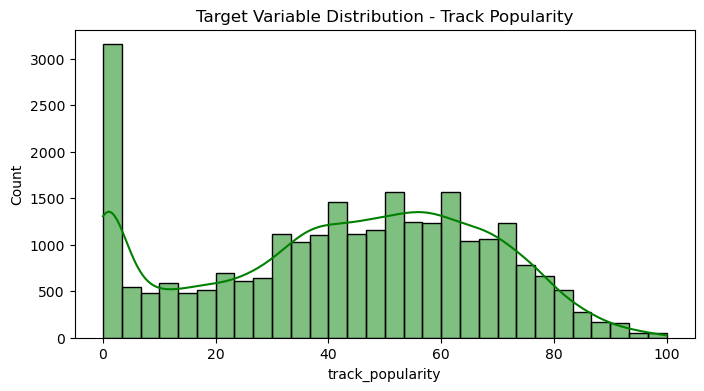

In [118]:
plt.figure(figsize=[8,4])
sns.histplot(target, color='g', bins=30, kde=True)
plt.title('Target Variable Distribution - Track Popularity')
plt.show()

- I will plot the historgram of train data to see the distribution of each continuous feature.

array([[<Axes: title={'center': 'danceability'}>,
        <Axes: title={'center': 'energy'}>,
        <Axes: title={'center': 'loudness'}>],
       [<Axes: title={'center': 'speechiness'}>,
        <Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'instrumentalness'}>],
       [<Axes: title={'center': 'liveness'}>,
        <Axes: title={'center': 'valence'}>,
        <Axes: title={'center': 'tempo'}>],
       [<Axes: title={'center': 'duration_ms'}>, <Axes: >, <Axes: >]],
      dtype=object)

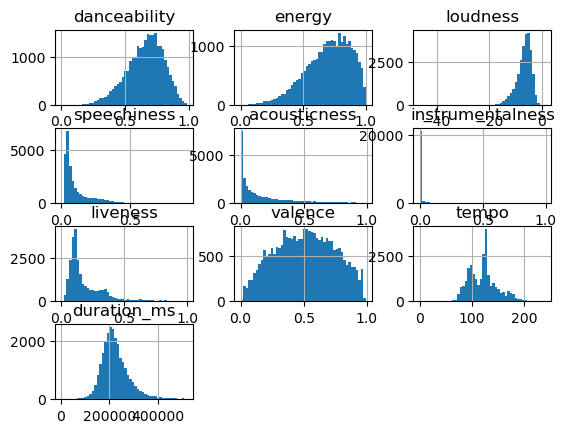

In [119]:
train_data.hist(bins=50, column=['danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'])

- Some of continuous features are not follow the normal distribution, I will normalize them later 

#### <center> 1.3. Feature Extraction/Selection


##### 1.3.1. Stratgies for each feature of data

- Now, I will consider the category columns. Let's take a look of these columns.

In [120]:
#Checking number of unique rows in each feature
train_data.nunique().sort_values()

mode                            2
playlist_genre                  6
key                            12
playlist_subgenre              24
playlist_name                 449
playlist_id                   471
danceability                  807
energy                        935
speechiness                  1252
valence                      1309
liveness                     1580
acousticness                 3582
track_album_release_date     4175
instrumentalness             4530
track_artist                 9332
loudness                     9491
tempo                       15269
track_album_name            16857
duration_ms                 16961
track_album_id              18968
track_name                  19669
track_id                    23248
dtype: int64

- With categorical columns: ***mode, playlist_genre, key, playlist_subgenre, playlist_name, playlist_id, track_album_release_date, track_artist, track_album_name, track_album_id, track_name, track_id***
    + I won't use these columns: ***track_album_name, track_album_id, track_name, track_id, playlist_id***
    + Other columns will be extracted as below.

*- Track artist*

In [121]:
train_data['track_artist'].value_counts()

track_artist
Martin Garrix                       127
Queen                               115
The Chainsmokers                    102
Drake                                83
David Guetta                         79
                                   ... 
Rodrigo Cartier                       1
Black Joe Lewis & The Honeybears      1
Captain Jack                          1
Vieux Farka Touré                     1
Gucci Crew II                         1
Name: count, Length: 9332, dtype: int64

After a few computation steps, I will group the artist into the categorical value base on the amount of their name in the ***track artist*** column. This strategy will make the classes are blanced:
    <ul>
    <li>Which artist has number of their name $>= 21$ will be counted as $Artists_1$</li>
    <li>Which artist has number of their name belong to $[20 - 9]$ will be encoded as $Artists_2$</li>
    <li>Which artist has number of their name belong to $[8 - 4]$ will be encoded as $Artists_3$</li>
    <li>Which artist has number of their name equal to $[3-2]$ will be encoded as $Artists_4$</li>
    <li>Which artist has number of their name equal to $1$ will be encoded as $Artists_5$</li>
    </ul> 

Now, I will implement the functions which transform the track_artist into groups of artists

In [122]:
def separate_track_artist(tr_artist_col: pd.Series):
    replace_dict = {}
    for index, value in tr_artist_col.value_counts().items():
        if int(value) >= 21:
            replace_dict[index] = 'Artists_1'
        elif int(value) <= 20 and int(value >= 9):
            replace_dict[index] = 'Artists_2'
        elif int(value) <= 8 and int(value >= 4):
            replace_dict[index] = 'Artists_3'
        elif int(value) <= 3 and int(value >= 2):
            replace_dict[index] = 'Artists_4'
        else:
            replace_dict[index] = 'Artists_5'
            
    replace_dict[None] = 'Artists_5'
    replace_dict[np.nan] = 'Artists_5'
    replace_dict[pd.NA] = 'Artists_5'
    
    return replace_dict

In [123]:
def track_artist_transform(X: pd.DataFrame):
    track_artist_col =  X['track_artist']
    artist_trans = X['track_artist'].replace(separate_track_artist(track_artist_col))
    
    return artist_trans

In [124]:
track_artist_transform(train_data).value_counts()

track_artist
Artists_5    5465
Artists_3    5385
Artists_4    5317
Artists_1    5162
Artists_2    4937
Name: count, dtype: int64

Then, I will use the same strategy as the ***track_artist*** column, encode the dataset into categorical values for the other categorical columns: ***playlist_name, track_album_release_date***.

*- track_album_release_date*

In [125]:
def separate_year(year):
    new_yr = None
    
    if year in [None, np.nan]:
        year = 0
    
    num_yr = int(year)
    if num_yr < 2008:
        new_yr = 'under 2008'
    elif num_yr >= 2008 and num_yr < 2016:
        new_yr = '2008-2015'
    elif num_yr >= 2016 and num_yr < 2019:
        new_yr = '2016-2018'
    else: new_yr = 'over 2018'
    
    return new_yr

In [126]:
def year_transform(X: pd.DataFrame):
    track_albumn_year = pd.to_datetime(X.track_album_release_date, format='mixed').dt.year
    trans_year = track_albumn_year.map(lambda x: separate_year(x))

    return trans_year

In [127]:
year_transform(train_data).value_counts()

track_album_release_date
over 2018     7875
2016-2018     6333
under 2008    6195
2008-2015     5863
Name: count, dtype: int64

*- playlist_name*

In [128]:
def separate_playlist_name(plst_name_col: pd.Series):
    replace_dict = {}
    for index, value in plst_name_col.value_counts().items():
        if int(value) >= 82:
            replace_dict[index] = 'Playlist_names_1'
        elif int(value) <= 81 and int(value >= 76):
            replace_dict[index] = 'Playlist_names_2'
        elif int(value) <= 75 and int(value >= 70):
            replace_dict[index] = 'Playlist_names_3'
        elif int(value) <= 69 and int(value >= 50):
            replace_dict[index] = 'Playlist_names_4'
        else:
            replace_dict[index] = 'Playlist_names_5'
    
    replace_dict[None] = 'Playlist_names_5'
    replace_dict[np.nan] = 'Playlist_names_5'
    replace_dict[pd.NA] = 'Playlist_names_5'
     
    return replace_dict

In [129]:
def playlist_name_transform(X: pd.DataFrame):
    playlist_name_col =  X['playlist_name'].copy()
    playlist_name_trans = X['playlist_name'].replace(separate_playlist_name(playlist_name_col))
    
    return playlist_name_trans

In [130]:
playlist_name_transform(train_data).value_counts()

playlist_name
Playlist_names_2    5642
Playlist_names_4    5386
Playlist_names_5    5263
Playlist_names_1    5046
Playlist_names_3    4929
Name: count, dtype: int64

*- Playlist genre - playlist subgenre*

- For these categorical data, I will mix them by concatenating the ***playlist_genre*** and ***playlist_subgenre***:

In [131]:
def separate_genre_concatenate(genre_concat_col: pd.Series):
    replace_dict = {}
    for index, value in genre_concat_col.value_counts().items():
        if int(value) >= 1300:
            replace_dict[index] = 'genres_1'
        elif int(value) <= 1299 and int(value >= 1090):
            replace_dict[index] = 'genres_2'
        elif int(value) <= 1089 and int(value >= 1020):
            replace_dict[index] = 'genres_3'
        else:
            replace_dict[index] = 'genres_4'
    
    replace_dict[None] = 'genres_4'
    replace_dict[np.nan] = 'genres_4'
    replace_dict[pd.NA] = 'genres_4'
    
    return replace_dict

In [132]:
def concate_genre(X: pd.DataFrame):
    genre_cate = X.loc[:, ['playlist_genre', 'playlist_subgenre']]
    genre_cate = genre_cate.assign(genre_subgenre = genre_cate.playlist_genre.astype(str) + " - " + genre_cate.playlist_subgenre.astype(str))
    genre_cate = genre_cate['genre_subgenre']
    
    return genre_cate

In [133]:
def genre_concatenate_transform(X: pd.DataFrame):
    genre_cate = concate_genre(X)
    replace_dct = separate_genre_concatenate(genre_cate)
    genre_cate = genre_cate.replace(replace_dct)
    
    return genre_cate

In [134]:
genre_concatenate_transform(train_data).value_counts()

genre_subgenre
genres_2    7014
genres_1    6777
genres_4    6245
genres_3    6230
Name: count, dtype: int64

- Continuous columns will be: ***danceability, energy, speechiness, valence, liveness, acousticness, instrumentalness, loudness, tempo, duration_ms***
    + I will use ***PCA*** to reduce the dimension of continuous columns

##### 1.3.2. Custom buil-in transformer

- I will build the ***Categories_Transform*** to transform the categorical columns as the above strategy.

In [135]:

class Categories_Transform(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        X_cpy = X.copy()

        # Track artist
        self.artist_encoder = OneHotEncoder(dtype=np.int8, handle_unknown='infrequent_if_exist').fit(track_artist_transform(X_cpy).to_frame())         # handle_unknown='infrequent_if_exist'
        self.artist_col_names = self.artist_encoder.categories_[0]
        
        # Playlist genre
        self.genre_encoder = OneHotEncoder(dtype=np.int8, handle_unknown='infrequent_if_exist').fit(genre_concatenate_transform(X_cpy).to_frame())
        self.genre_col_names = self.genre_encoder.categories_[0]
        
        # Year
        self.year_encoder = OneHotEncoder(dtype=np.int8, handle_unknown='infrequent_if_exist').fit(year_transform(X_cpy).to_frame())
        self.year_col_names = self.year_encoder.categories_[0]
        
        # Playlist name
        self.plst_name_encoder = OneHotEncoder(dtype=np.int8, handle_unknown='infrequent_if_exist').fit(playlist_name_transform(X_cpy).to_frame())
        self.plst_name_col_names = self.plst_name_encoder.categories_[0]
        
        # Key
        self.key_encoder = OneHotEncoder(dtype=np.int8, handle_unknown='infrequent_if_exist').fit(X_cpy.loc[:, ['key']])
        self.key_col_names = self.key_encoder.categories_[0]
        
        return self
    
    def transform(self, X):
        X_cpy = X.copy()
        # X_cpy.dropna(how='any', axis=0, inplace=True)
        
        artist_cat_onehot = self.artist_encoder.transform(X_cpy[['track_artist']]).toarray()
        
        genre_cat_onehot = self.genre_encoder.transform(concate_genre(X_cpy).to_frame()).toarray()
        
        year_cat_onehot = self.year_encoder.transform(X_cpy[['track_album_release_date']]).toarray()
        
        plst_name_cat_onehot = self.plst_name_encoder.transform(X_cpy[['playlist_name']]).toarray()
        
        key_cat_onehot = self.key_encoder.transform(X_cpy.loc[:, ['key']]).toarray()
        
        # Replace category columns
        df_artist = pd.DataFrame(artist_cat_onehot, columns=self.artist_col_names)
        df_genre = pd.DataFrame(genre_cat_onehot, columns=self.genre_col_names)
        df_year =  pd.DataFrame(year_cat_onehot, columns=self.year_col_names)
        df_plst_name = pd.DataFrame(plst_name_cat_onehot, columns=self.plst_name_col_names)
        df_key = pd.DataFrame(key_cat_onehot, columns=self.key_col_names)
        X_cpy = pd.concat([ df_artist, df_genre, df_year, df_plst_name, df_key], axis = 1)

        return X_cpy

Now, I will make the pipeline for continuous features and categorical features:


+ Numerical pipeline

In [136]:
num_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('standardization', StandardScaler()),
    ('pca', PCA(n_components=0.95, svd_solver="auto")),
])

- Categorical pipeline

In [137]:
cat_pipeline = Pipeline(steps=[
    ('category_transform', Categories_Transform())
])

- Column Transformer

In [138]:
# Numeric columns to be transformed
num_cols = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

# Category columns to be extracted
cat_cols = ['key', 'playlist_genre', 'playlist_subgenre', 'track_id','track_artist', 'track_name', 
             'track_album_id', 'track_album_name', 'playlist_name', 'playlist_id', 'track_album_release_date']

In [139]:
col_transformer = ColumnTransformer(transformers=[
    ('num_pipeline', num_pipeline, num_cols),
    ('cat_pipeline', cat_pipeline, cat_cols)
], remainder='passthrough', n_jobs=-1)

#### <center> 1.4. Data Pre-processing


- In order to get the best model, I will split the **TRAIN** dataset into train set ***(x_Train, y_Train)*** and test set ***(x_Test, y_Test)***

In [140]:
x_Train, x_Test, y_Train, y_Test = train_test_split(train_data, target, train_size=0.8, test_size=0.2, random_state=100)
x_Train.reset_index(drop=True,inplace=True)

print('Original set  ---> ',train_data.shape,target.shape,'\nTraining set  ---> ',x_Train.shape,y_Train.shape,'\nTesting set   ---> ', x_Test.shape,'', y_Test.shape)

Original set  --->  (26266, 22) (26266,) 
Training set  --->  (21012, 22) (21012,) 
Testing set   --->  (5254, 22)  (5254,)


In [141]:
col_transformer.fit(x_Train, target)
X_Train = col_transformer.transform(x_Train)
X_Test = col_transformer.transform(x_Test)

#### <center> 1.5. Predictive Modelling


- For this problem which is predicting the continuous value: ***track_popularity***, I will use **Regressor** models:
    - *Linear Regression  -  Ridge  -  Lasso  -  Elastic-Net*
    - *Polynormial Regression*
    - *DecisionTreeRegressor*
    - *RandomForestRegressor*
    - *SVR (Suport Vector Machine for Regressor)*
    - *Voting Regressor: Combine all the regression models*

- First, I will define the Evaluate function to evaluate the model

In [142]:
def Evaluate_model(x_train, y_train, y_pred_train, x_test, y_test, y_pred_test, plot=True):
    # Evaluate the model
    mlse = mean_squared_log_error(y_test, y_pred_test)
    mae = mean_absolute_error(y_test, y_pred_test)
    r2 = r2_score(y_test, y_pred_test)

    print(f"Mean Squared Logarithmic Error: {mlse:.2f}")
    print(f"Mean Absolute Error: {mae:.2f}")
    print(f"R² Score: {r2:.2f}")

    
    if plot:
        # Visualization
        plt.figure(figsize=(14, 12))

        # Plot true vs predicted values (Test Set)
        plt.subplot(2, 2, 1)
        sns.scatterplot(x=y_test, y=y_pred_test)
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
        plt.xlabel('Actual')
        plt.ylabel('Predicted')
        plt.title('Actual vs Predicted Values (Test Set)')

        # Residual plot (Test Set)
        plt.subplot(2, 2, 2)
        residuals_test = y_test - y_pred_test
        sns.histplot(residuals_test, kde=True, bins=20)
        plt.xlabel('Residuals')
        plt.title('Residuals Distribution (Test Set)')

        # Plot feature-wise visualization for Training Set
        # Find columns with >= 50 unique values
        columns_with_50_unique = [i for i in range(x_train.shape[1]) if len(np.unique(x_train[:, i])) >= 50]
        
        for i in columns_with_50_unique:
            plt.figure(figsize=(12, 4))
            plt.subplot(1, 2, 1)
            sns.scatterplot(x=x_train[:, i], y=y_train, label='Actual')
            sns.scatterplot(x=x_train[:, i], y=y_pred_train, label='Predicted')
            plt.xlabel(f'Feature {i+1}')
            plt.ylabel('Target')
            plt.title(f'Feature {i+1} vs Target (Train Set)')
            plt.legend()

            # Plot feature-wise visualization for Test Set
            plt.subplot(1, 2, 2)
            sns.scatterplot(x=x_test[:, i], y=y_test, label='Actual')
            sns.scatterplot(x=x_test[:, i], y=y_pred_test, label='Predicted')
            plt.xlabel(f'Feature {i+1}')
            plt.ylabel('Target')
            plt.title(f'Feature {i+1} vs Target (Test Set)')
            plt.legend()
            plt.tight_layout()
            plt.show()

        plt.tight_layout()
        plt.show()

##### 1.5.1 Linear Regression - Ridge - Lasso

- Linear Regression

<img src="https://raw.githubusercontent.com/Masterx-AI/Project_BoomBikes_Share_Prediction/main/mr.png" style="width: 600px;float: left;"/>

In [143]:
MLR = LinearRegression()
MLR.fit(X_Train, y_Train)
y_pred_train = MLR.predict(X_Train)
y_pred_test = MLR.predict(X_Test)

In [144]:
Evaluate_model(X_Train, y_Train, y_pred_train, X_Test, y_Test, y_pred_test, plot=False)

Mean Squared Logarithmic Error: 1.70
Mean Absolute Error: 20.32
R² Score: 0.07


- Ridge Regression

<img src="https://raw.githubusercontent.com/Masterx-AI/Project_BoomBikes_Share_Prediction/main/ridge.png" style="width: 500px;float: left;"/>

In [145]:
ridge_reg = Ridge(alpha=1).fit(X_Train, y_Train)
y_pred_train = ridge_reg.predict(X_Train)
y_pred_test = ridge_reg.predict(X_Test)

In [146]:
Evaluate_model(X_Train, y_Train, y_pred_train, X_Test, y_Test, y_pred_test, plot=False)

Mean Squared Logarithmic Error: 1.69
Mean Absolute Error: 20.31
R² Score: 0.07


- Lasso Regression

<img src="https://raw.githubusercontent.com/Masterx-AI/Project_BoomBikes_Share_Prediction/main/lasso.png" style="width: 500px;float: left;"/>

In [147]:
lasso_reg = Lasso(alpha=1).fit(X_Train, y_Train)
y_pred_train = lasso_reg.predict(X_Train)
y_pred_test = lasso_reg.predict(X_Test)

In [148]:
Evaluate_model(X_Train, y_Train, y_pred_train, X_Test, y_Test, y_pred_test, plot=False)

Mean Squared Logarithmic Error: 1.72
Mean Absolute Error: 20.48
R² Score: 0.06


- Elastic-Net Regression

<img src="https://raw.githubusercontent.com/Masterx-AI/Project_BoomBikes_Share_Prediction/main/en.png" style="width: 500px;float: left;"/>

In [149]:
elastic_reg = ElasticNet(alpha=1, l1_ratio=0.2).fit(X_Train, y_Train)
y_pred_train = elastic_reg.predict(X_Train)
y_pred_test = elastic_reg.predict(X_Test)

In [150]:
Evaluate_model(X_Train, y_Train, y_pred_train, X_Test, y_Test, y_pred_test, plot=False)

Mean Squared Logarithmic Error: 1.73
Mean Absolute Error: 20.51
R² Score: 0.05


##### 1.5.2 Polynomial Regression

<img src="https://raw.githubusercontent.com/Masterx-AI/Project_BoomBikes_Share_Prediction/main/pn.png" style="width: 500px;float: left;"/>

In [151]:
poly_reg = Pipeline(steps=[('preprocessor', PolynomialFeatures(degree=2)), ('estimator', LinearRegression())])
poly_reg.fit(X_Train, y_Train)
y_pred_train = poly_reg.predict(X_Train)
y_pred_test = poly_reg.predict(X_Test)

In [152]:
Evaluate_model(X_Train, y_Train, y_pred_train, X_Test, y_Test, y_pred_test, plot=False)

Mean Squared Logarithmic Error: 1.67
Mean Absolute Error: 20.01
R² Score: 0.09


##### 1.5.3 Decision Tree Regressor

In [153]:
est = DecisionTreeRegressor(max_depth = 50)
params = {'criterion': ['squared_error','friedman_mse', 'absolute_error', 'poisson'],
                  'splitter':['best','random'],
                  'max_depth': range(10,100,10),
                  'min_samples_split': range(2,10),
                  'min_samples_leaf': range(1,10),
                  'max_leaf_nodes': range(10,100,10),
                  'ccp_alpha': np.arange(0.0,0.1,0.01)}
clf = RandomizedSearchCV(est, params, n_iter=5, scoring='neg_mean_squared_log_error', return_train_score=True)
clf.fit(X_Train, y_Train)
y_pred_train = clf.best_estimator_.predict(X_Train)
y_pred_test = clf.best_estimator_.predict(X_Test)

In [154]:
print(clf.best_params_)

{'splitter': 'random', 'min_samples_split': 6, 'min_samples_leaf': 9, 'max_leaf_nodes': 50, 'max_depth': 80, 'criterion': 'squared_error', 'ccp_alpha': 0.03}


In [155]:
Evaluate_model(X_Train, y_Train, y_pred_train, X_Test, y_Test, y_pred_test, plot=False)

Mean Squared Logarithmic Error: 1.71
Mean Absolute Error: 20.43
R² Score: 0.05


##### 1.5.4 Random Forest Regressor

In [156]:
est = RandomForestRegressor(n_estimators = 100)
params = {'n_estimators': range(10, 200, 50),
            'criterion': ['absolute_error', 'squared_error', 'friedman_mse', 'poisson'],
            'max_depth': range(40,100,10),
            'min_samples_split': range(2,10,2),
            'min_samples_leaf': range(1,10,2),
            'max_leaf_nodes': range(50,200,30),
            'ccp_alpha': np.arange(0.0,0.1,0.01)}

clf = RandomizedSearchCV(est, params, n_iter=2, scoring='neg_mean_squared_error', return_train_score=True)
clf.fit(X_Train, y_Train)
y_pred_train = clf.best_estimator_.predict(X_Train)
y_pred_test = clf.best_estimator_.predict(X_Test)

In [157]:
print(clf.best_params_)

{'n_estimators': 60, 'min_samples_split': 6, 'min_samples_leaf': 7, 'max_leaf_nodes': 110, 'max_depth': 80, 'criterion': 'poisson', 'ccp_alpha': 0.01}


In [158]:
Evaluate_model(X_Train, y_Train, y_pred_train, X_Test, y_Test, y_pred_test, plot=False)

Mean Squared Logarithmic Error: 1.68
Mean Absolute Error: 20.13
R² Score: 0.09


##### 1.5.5 SVR (Suport Vector Machine for Regressor)

In [159]:
est = SVR(kernel= 'poly', epsilon= 0.1, degree= 3, C = 21)
params = {
        'C': range(1,50,20),
        'kernel': ['linear', 'poly', 'rbf','sigmoid'],
        'degree': range(1,5,2),
        'epsilon': np.arange(0.1, 1, 0.3)
        }

bagging_reg = BaggingRegressor(estimator=est, n_estimators=9, max_samples=3000, max_features=3, bootstrap=False)

# clf = GridSearchCV(est, params, scoring='neg_mean_squared_error', return_train_score=True)
clf.fit(X_Train, y_Train)
y_pred_train = clf.best_estimator_.predict(X_Train)
y_pred_test = clf.best_estimator_.predict(X_Test)

In [160]:
Evaluate_model(X_Train, y_Train, y_pred_train, X_Test, y_Test, y_pred_test, plot=False)

Mean Squared Logarithmic Error: 1.66
Mean Absolute Error: 19.89
R² Score: 0.11


##### 1.5.6 Voting Regressor: Combine all regression models

- In this final regressor, I will build the complete pipeline from *data preprocessing* to *estimator*

- Here, I will use Elastic-Net for both Ridge and Lasso

In [161]:
vote_reg = VotingRegressor(estimators=[
    ('linearreg', LinearRegression()),
    ('polyreg', poly_reg),
    ('elasticnet', ElasticNet()),
    ('dtreereg', DecisionTreeRegressor()),
    ('randforreg', RandomForestRegressor()),
    ('bagreg', BaggingRegressor(estimator=SVR(kernel= 'poly', epsilon= 0.1, degree= 3, C = 21),
                                n_estimators=9, max_samples=3000, max_features=3, bootstrap=False))  
])

In [162]:
final_pipeline = Pipeline(steps=[
    ('transformer', col_transformer),
    ('voting', vote_reg)
])

In [163]:
hyper_parameters_global = {
    # Elastic-Net
    'voting__elasticnet__alpha': [0.1, 1.0, 10.0],
    'voting__elasticnet__l1_ratio': [0.1, 0.5, 0.9],
    
    # DecisionTreeRegressor
    'voting__dtreereg__criterion': ['squared_error', 'absolute_error'],
    'voting__dtreereg__max_depth': [10, 30, 50],
    'voting__dtreereg__min_samples_split': [2, 5, 10],
    'voting__dtreereg__min_samples_leaf': [1, 3, 5],
    
    # RandomForestRegressor
    'voting__randforreg__n_estimators': [50, 100],
    'voting__randforreg__max_depth': [20, 40],
    'voting__randforreg__min_samples_split': [2, 5],
    'voting__randforreg__min_samples_leaf': [1, 3],
    
    # BaggingRegressor (SVR)
    'voting__bagreg__estimator__kernel': ['linear', 'rbf'],
    'voting__bagreg__estimator__C': [1, 10],
    'voting__bagreg__estimator__epsilon': [0.1, 0.2],
    'voting__bagreg__estimator__degree': [2, 3],
    'voting__bagreg__max_features': [2, 3],
}


In [164]:
clf = RandomizedSearchCV(
    final_pipeline,
    param_distributions=hyper_parameters_global,
    n_iter=10,  # Adjust the number of random samples
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=2,  # Reduce the number of parallel jobs
    verbose=2,
    random_state=42
)
clf.fit(x_Train, y_Train)
# clf.predict(x_Test)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(n_jobs=-1,
                                                                remainder='passthrough',
                                                                transformers=[('num_pipeline',
                                                                               Pipeline(steps=[('impute',
                                                                                                SimpleImputer()),
                                                                                               ('standardization',
                                                                                                StandardScaler()),
                                                                                               ('pca',
                                                                                                PCA(n_components=0.95))]),
                                                                               ['danceability',
                                                                                'energy',
                                                                                'loudness',
                                                                                'speechiness',
                                                                                'acousticness',
                                                                                'instrumentalness',
                                                                                'liven...
                                        'voting__dtreereg__min_samples_split': [2,
                                                                                5,
                                                                                10],
                                        'voting__elasticnet__alpha': [0.1, 1.0,
                                                                      10.0],
                                        'voting__elasticnet__l1_ratio': [0.1,
                                                                         0.5,
                                                                         0.9],
                                        'voting__randforreg__max_depth': [20,
                                                                          40],
                                        'voting__randforreg__min_samples_leaf': [1,
                                                                                 3],
                                        'voting__randforreg__min_samples_split': [2,
                                                                                  5],
                                        'voting__randforreg__n_estimators': [50,
                                                                             100]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [184]:
y_pred_train = clf.best_estimator_.predict(x_Train)
y_pred_test = clf.best_estimator_.predict(x_Test)

Mean Squared Logarithmic Error: 1.65
Mean Absolute Error: 19.11
R² Score: 0.17


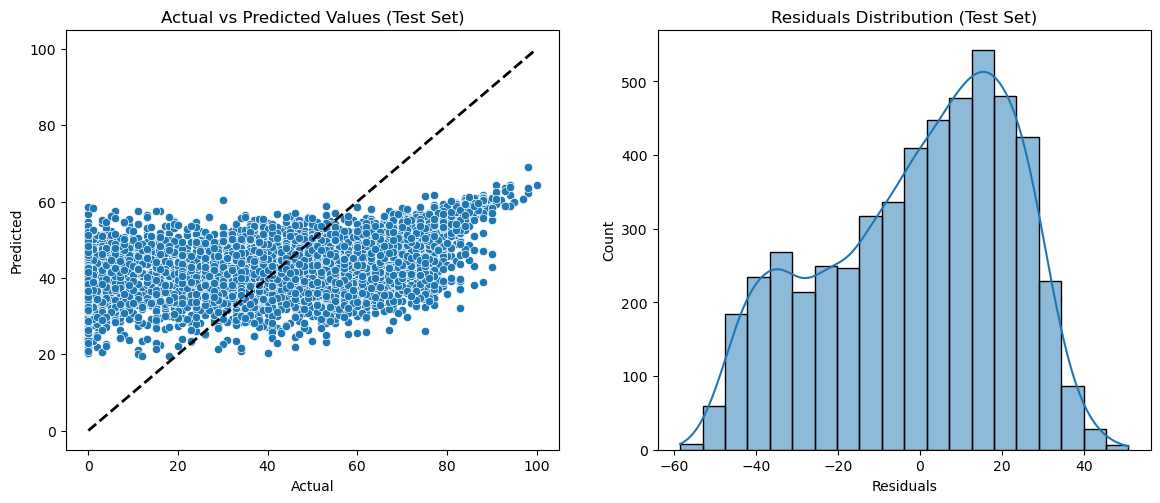

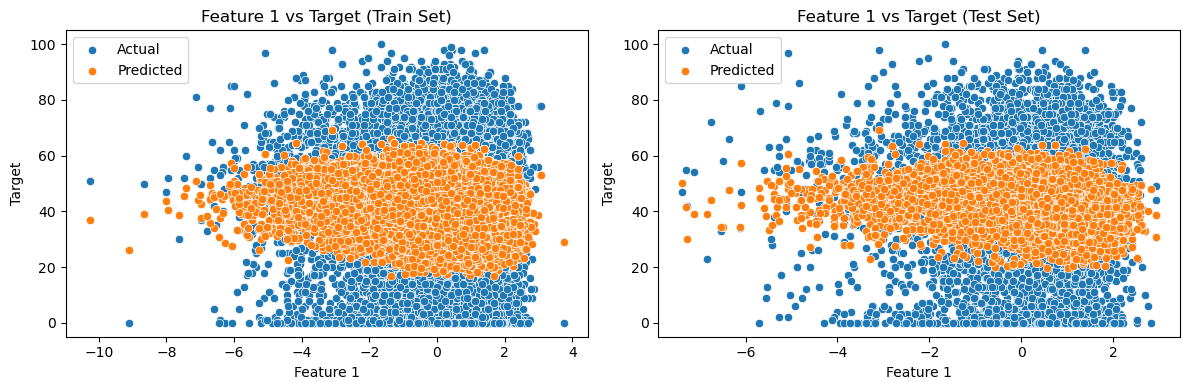

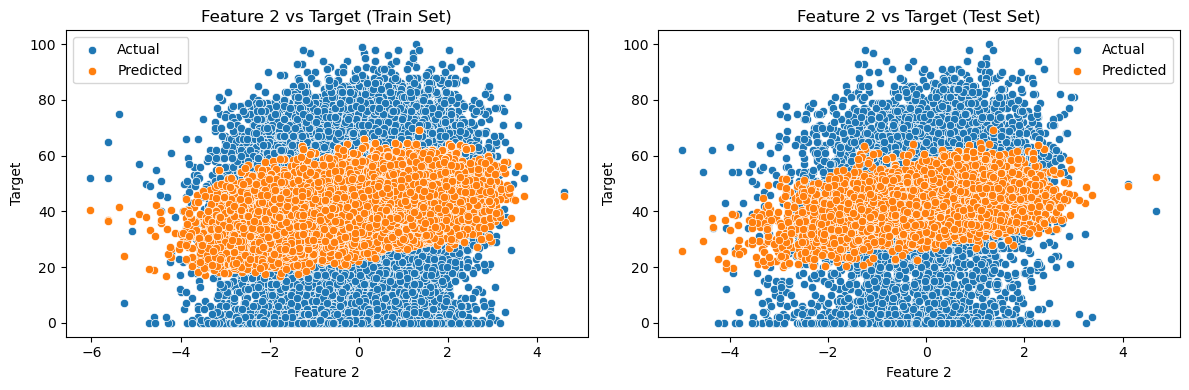

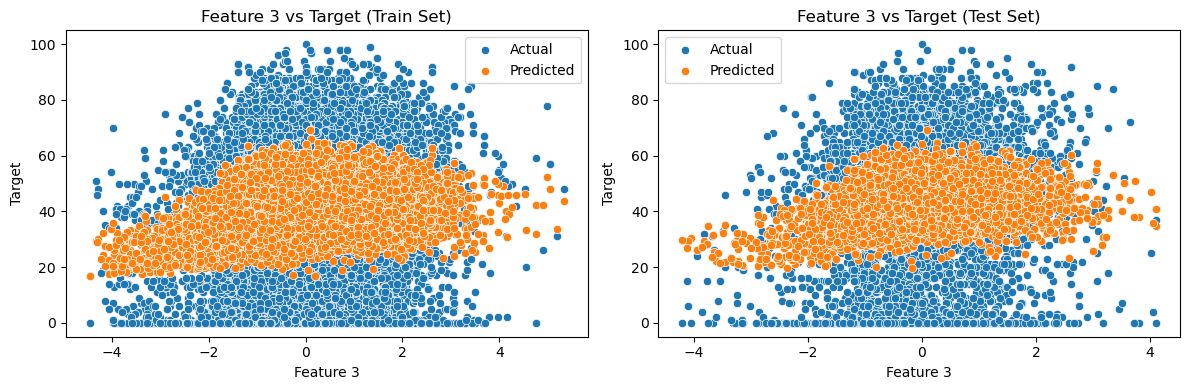

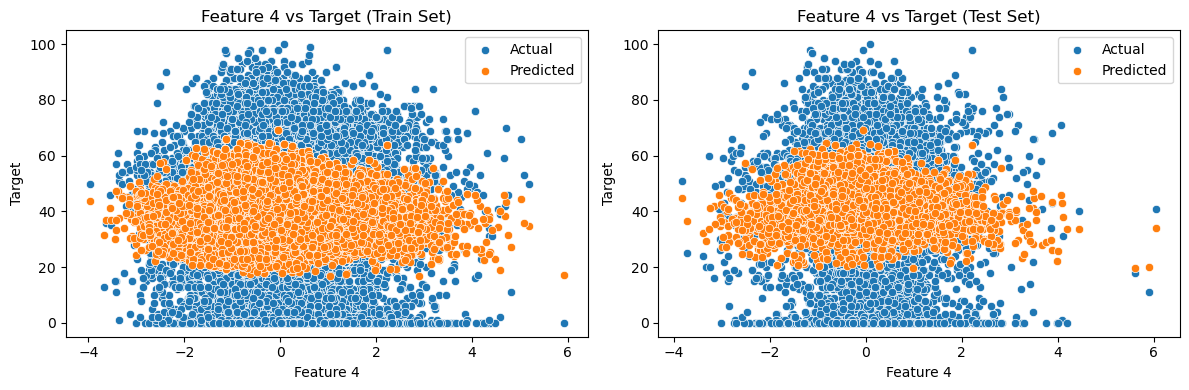

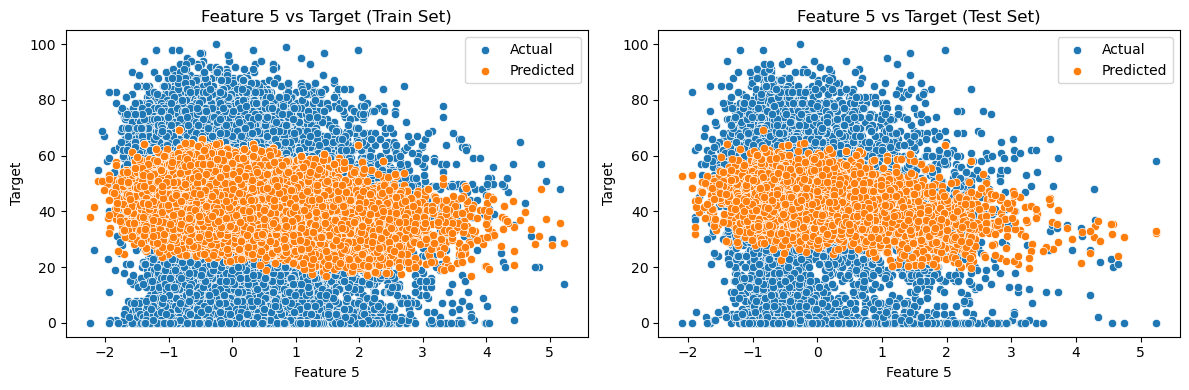

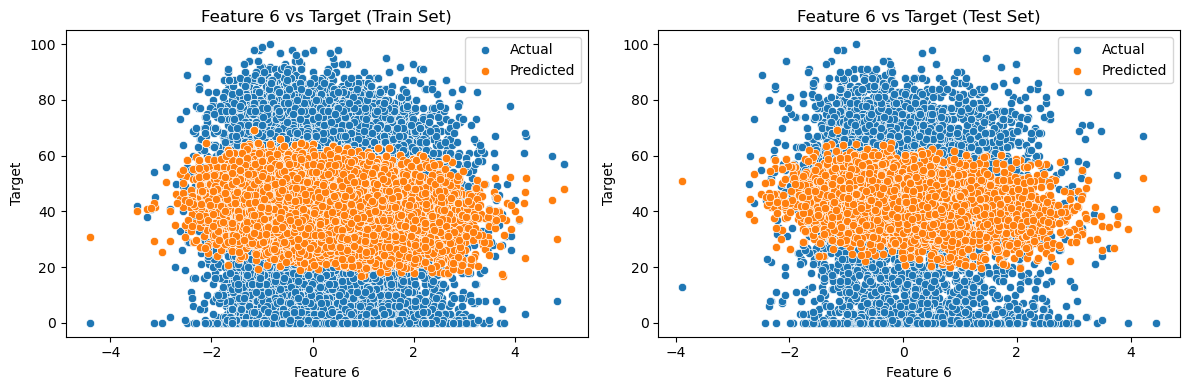

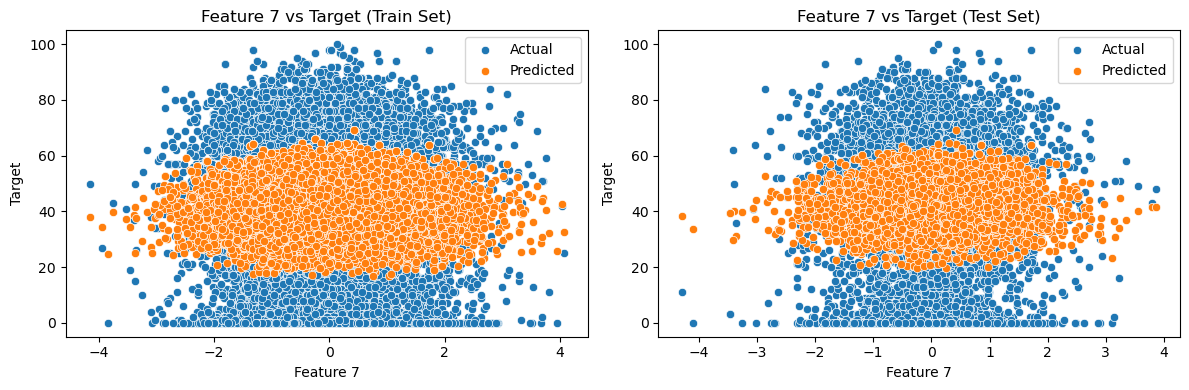

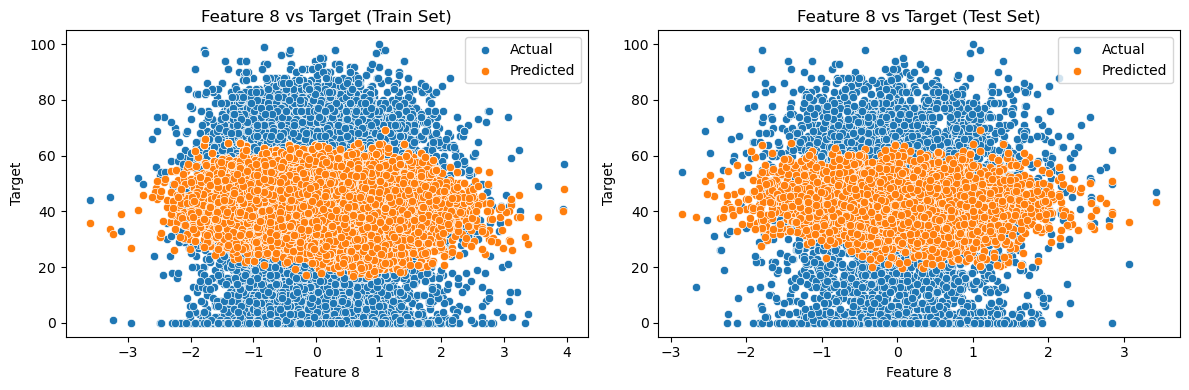

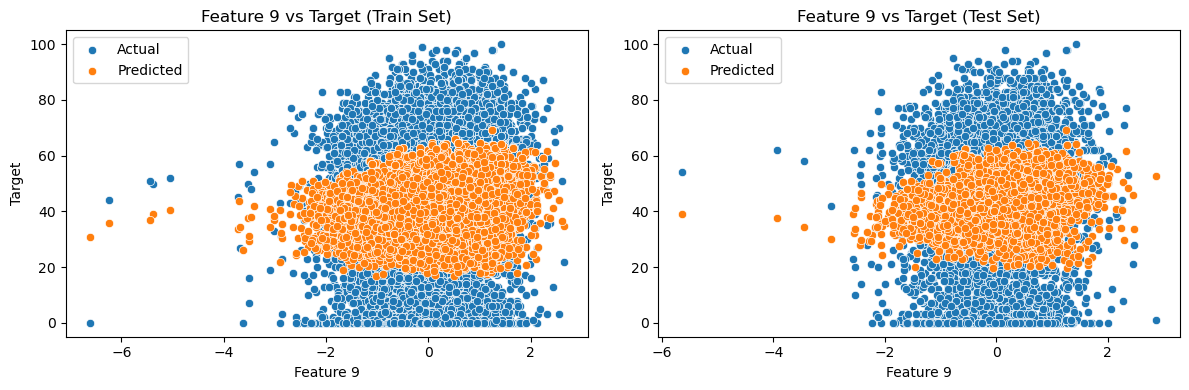

<Figure size 640x480 with 0 Axes>

In [187]:
Evaluate_model(X_Train, y_Train, y_pred_train, X_Test, y_Test, y_pred_test, plot=True)

##### 1.5.7 Predict the track_popularity for TEST data

- Now, I will use best model to predict the TEST dataset

In [189]:
unnamed_col = TEST['Unnamed: 0']
test_data = TEST.drop(['Unnamed: 0'],axis=1)
test_data.fillna(np.nan)
print("Shape of test data: ", test_data.shape)

# Predict the y_test
y_pred = clf.best_estimator_.predict(test_data)

Shape of test data:  (6567, 22)


- Export to CSV file

In [212]:
df_ML = pd.DataFrame({
    'Unnamed:0': unnamed_col,
    'y_pred_ML': y_pred
})
df_ML.set_index(df_ML.columns[0], inplace=True)
df_ML.index.name = None
df_ML.to_csv('prediction.csv', index=True)

#### <center> 1.6. Task Outcomes & Conclusion


- Visualizing the data distribution and exploring feature relationships provided valuable insights into the dataset's structure and key patterns.
- Evaluating multiple regression algorithms with default hyperparameters offered a comparative understanding of their performance on this dataset.
- The **VotingRegressor**, which combines predictions from multiple regression models, delivered improved results. However, this enhanced performance came at the cost of increased computational time for training.

---
### 2. Task 2: Recommender Systems:
- Stractegic Plan of Action:

    1. *Content-based Recommendation Systems*

    2. *Item-Based Collaborative Filtering*
    3. *Matrix Factorization Collaborative Filtering*
    4. *Conclusion*

- Now, I will choose 100 songs from the data, assume that user has favorite artists: ***'Ed Sheeran', 'Bruno Mars', 'Justin Bieber, Maroon 5'***. From that information, I will get randomly 100 songs which have those features from the dataset.

- I will add column named ***liked*** to indicate that user likes or not ($1$ means like and $0$ mean not like or not interact)

In [165]:
favor_songs = TRAIN[TRAIN['track_artist'].isin(['Ed Sheeran', 'Bruno Mars', 'Justin Bieber','Maroon 5'])]
favor_songs.drop_duplicates(inplace=True)
favor_songs.drop(['Unnamed: 0'], axis=1, inplace=True)
favor_songs['liked'] = 1
sample_favor_df = favor_songs.sample(n=100, random_state=5)


C:\Users\Admin\AppData\Local\Temp\ipykernel_5888\1822496255.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  favor_songs.drop_duplicates(inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_5888\1822496255.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  favor_songs.drop(['Unnamed: 0'], axis=1, inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_5888\1822496255.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

- Now, I will take 5 samples of this data to be the songs that user has liked.

In [166]:
like_songs = sample_favor_df.head()
like_songs

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,liked
3468,3vQhEd4lOg4mAV6CHCgoHW,South of the Border (feat. Camila Cabello & Ca...,Ed Sheeran,65,05Bru0ZVTxp4orAyrZIA77,South of the Border (feat. Camila Cabello & Ca...,2019-10-04,Dance Pop,37i9dQZF1DWZQaaqNMbbXa,pop,...,-4.388,1,0.0404,0.2200,0.000046,0.3350,0.491,110.012,173455,1
14599,2b8fOow8UzyDFAE27YhOZM,Memories,Maroon 5,98,3nR9B40hYLKLcR0Eph3Goc,Memories,2019-09-20,Charts 2020 🔥Top 2020🔥Hits 2020🔥Summer 2020🔥Po...,3xMQTDLOIGvj3lWH5e5x6F,edm,...,-7.209,1,0.0546,0.8370,0.000000,0.0822,0.575,91.019,189486,1
11593,3w3y8KPTfNeOKPiqUTakBh,Locked Out of Heaven,Bruno Mars,78,58ufpQsJ1DS5kq4hhzQDiI,Unorthodox Jukebox,2012-12-07,Electropop Hits 2017-2020,7kyvBmlc1uSqsTL0EuNLrx,pop,...,-4.165,1,0.0431,0.0490,0.000000,0.3090,0.867,143.994,233478,1
25417,2A17f6I4fh6GqYX0J8noGr,Galway Girl - Martin Jensen Remix,Ed Sheeran,58,77lUgFzLJriGpyTx2pGbCO,Galway Girl (Martin Jensen Remix),2017-04-07,Tropical House Remixes 🍍 Tropical Remixes & Tr...,3YdAwfgQLMS4AN2WjRfRlb,latin,...,-4.576,1,0.0438,0.0245,0.000000,0.1410,0.731,100.055,196044,1
26067,4llK75pXNWZz6KAho2Gp16,She Will Be Loved - Radio Mix,Maroon 5,80,5zClcGCSWj926AMjvBNSLc,Songs About Jane: 10th Anniversary Edition,2002,post teen pop,2ltt5ouiEO301o2jbxn30d,pop,...,-5.569,0,0.0281,0.2280,0.000000,0.0994,0.465,102.000,259453,1


- Now, I will choose 20 samples of dataset of not liked or not interact songs and mix them with the liked songs. So the ratio between $0$ and $1$ is $4:1$

In [167]:
not_favor = TRAIN[~TRAIN['track_artist'].isin(['Ed Sheeran', 'Bruno Mars', 'Justin Bieber','Maroon 5'])]
not_favor.drop(['Unnamed: 0'], axis=1, inplace=True)
not_favor['liked'] = 0
sample_not_favor_df = not_favor.head(20)

# Concatenate the two DataFrames
combined_df = pd.concat([like_songs, sample_not_favor_df])
# Shuffle the rows
final_df = combined_df.sample(frac=1, random_state=42).reset_index(drop=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_5888\982695571.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_favor.drop(['Unnamed: 0'], axis=1, inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_5888\982695571.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_favor['liked'] = 0


#### <center> 2.1. Content-based Recommendation Systems

- Extract ***x_Train, x_Test*** and ***y_Train, yTest***

In [168]:
# Train data
x_Train_resys = final_df.drop(['liked'], axis=1)
y_Train_resys = final_df['liked']

# Test data
test_sample = pd.concat([favor_songs.iloc[5:], not_favor.iloc[20:]], axis=0, ignore_index=True)
# Shuffle the rows
test_df = test_sample.sample(frac=1, random_state=42).reset_index(drop=True)
x_Test_resys = test_df.drop(['liked'], axis=1)
y_Test_resys = test_df['liked']

In [169]:
# Numeric values
num_cols_resys = ['danceability', 'energy', 'track_popularity', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

# Category values
cat_cols_resys = ['key', 'playlist_genre', 'playlist_subgenre', 'track_id','track_artist', 'track_name', 
             'track_album_id', 'track_album_name', 'playlist_name', 'playlist_id', 'track_album_release_date']

In [170]:
col_transformer_resys = ColumnTransformer(transformers=[
    ('num_pipeline', num_pipeline, num_cols_resys),
    ('cat_pipeline', cat_pipeline, cat_cols_resys)
], remainder='passthrough', n_jobs=-1)
pipe_resys = Pipeline(steps=[
    ('transformer', col_transformer_resys)
])

In [171]:
x_Train_resys_trans = pipe_resys.fit_transform(x_Train_resys)
x_Test_resys_trans = pipe_resys.transform(x_Test_resys)

In [172]:
def recommend_content_based(x_train, y_train, x_test):
    clf = Ridge(alpha=0.01, fit_intercept=True)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    top_five = np.argsort(np.array(y_pred).reshape(-1))[-5:][::-1]
    
    return top_five

top_five = recommend_content_based(x_Train_resys_trans, y_Train_resys, x_Test_resys_trans)
x_Test_resys.iloc[top_five]

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
7089,6BwN05qKw4Q8bNoq3rYuz7,Drop It,Tujamo,69,50BqATA6XSJtAsXQpsHRIi,Drop It,2019-09-13,Electro House Top Tracks,1G0q0NK7g3C0XerNqq7GbL,edm,...,5,-4.257,0,0.0642,0.0104,0.763,0.0541,0.177,126.036,175714
290,4jBpZsZ9qx3cZhoEfuKElF,La Mentira - Remix,Brytiago,71,1wFqv2q07zfETMmB1NMDyC,La Mentira (Remix),2019-05-17,El Ritmo,37i9dQZF1DWVOLXBOylBUZ,latin,...,5,-3.942,0,0.2460,0.3950,0.000,0.1090,0.510,93.991,388800
4664,5icOoE6VgqFKohjWWNp0Ac,Here With Me,Marshmello,83,6NHS3hV16MZyfcp0nSHdrd,Here With Me,2019-03-08,Dance Pop,37i9dQZF1DWZQaaqNMbbXa,pop,...,5,-3.933,0,0.0439,0.0623,0.000,0.1560,0.181,99.961,156347
18797,5icOoE6VgqFKohjWWNp0Ac,Here With Me,Marshmello,83,6NHS3hV16MZyfcp0nSHdrd,Here With Me,2019-03-08,Pop - Pop UK - 2019 - Canadian Pop - 2019 - Pop,46Cl6dmeiylK6TRGXr7hHe,pop,...,5,-3.933,0,0.0439,0.0623,0.000,0.1560,0.181,99.961,156347
11151,0OWcpVA83HI8Pb5DybDuoX,"Tumbando el Club (feat. C.R.O., Obiewanshot, Y...",Neo Pistea,69,36ehOw44KSj8riww8Eamd8,"Tumbando el Club (feat. C.R.O., Obiewanshot, Y...",2019-03-27,Trapperz,37i9dQZF1DWUmxBdWX3Pp4,rap,...,5,-4.445,1,0.0504,0.3540,0.000,0.1350,0.533,121.985,456940


- Let's compare the liked songs and the suggestions

In [174]:
for artist in like_songs['track_artist']:
    print("Liked songs: ", train_data[train_data['track_artist'] == artist]['track_artist'].value_counts())

Liked songs:  track_artist
Ed Sheeran    56
Name: count, dtype: int64
Liked songs:  track_artist
Maroon 5    56
Name: count, dtype: int64
Liked songs:  track_artist
Bruno Mars    26
Name: count, dtype: int64
Liked songs:  track_artist
Ed Sheeran    56
Name: count, dtype: int64
Liked songs:  track_artist
Maroon 5    56
Name: count, dtype: int64


- We can see that none of the track_artist are in the favorist artists list. But two suggestions has the artist: **Marshmello** is in the same group: ***Artist_1*** (number of frequency greater than $20$) with the liked songs.   
- The liked_songs have high popularity $(>=50)$ and the suggestions also have the high popularity
- The playlist_genre between the suggestions and liked_songs have the common: ***pop, edmm, latin***

##### <center> 2.2. Item-Based Collaborative Filtering

In [175]:
# Create data sample
item_sample = pd.concat([favor_songs[5:], not_favor], axis=0, ignore_index=True)
item_sample.drop_duplicates(inplace=True)
# Shuffle the rows
item_df = item_sample.sample(frac=1, random_state=42).reset_index(drop=True)
x_resys = item_df.drop(['liked'], axis=1)
y_resys = item_df['liked']

In [176]:
x_like_songs = like_songs.drop(['liked'], axis=1)

In [177]:
x_sample = pipe_resys.fit_transform(x_resys)
x_liked_songs = pipe_resys.transform(x_like_songs)

In [178]:
def recommend_item_based(liked_songs, sample):
    ids = []
    for song in liked_songs:
        song = song.reshape(1,-1)
        item_similarity = cosine_similarity(song, sample)
        top_sim = np.argsort(np.array(item_similarity).reshape(-1))[-2:-1][::-1]
        ids.append(top_sim)
        
    return ids
ids = recommend_item_based(x_liked_songs, x_sample)
item_df.iloc[np.array(ids).reshape(-1)]

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,liked
258,2RCUr24WkEe2r5Vv4oDKlN,Blame It on Your Love (feat. Lizzo),Charli XCX,63,386IqvSuljaZsMjwDGGdLj,Charli,2019-09-13,POPTIMISM,6lWMi4lPiiPwDqn8ZpeyAY,pop,...,-2.673,1,0.0481,0.0262,0.000000,0.2940,0.598,100.022,191507,0
14614,2b8fOow8UzyDFAE27YhOZM,Memories,Maroon 5,98,3nR9B40hYLKLcR0Eph3Goc,Memories,2019-09-20,Most Popular 2020 TOP 50,1fqkbjEACMlekdddm5aobE,r&b,...,-7.209,1,0.0546,0.8370,0.000000,0.0822,0.575,91.019,189486,1
18623,3w3y8KPTfNeOKPiqUTakBh,Locked Out of Heaven,Bruno Mars,78,58ufpQsJ1DS5kq4hhzQDiI,Unorthodox Jukebox,2012-12-07,Today's Hits 2000-Present,6a66cg3HcsjYkisYyQcov6,latin,...,-4.165,1,0.0431,0.0490,0.000000,0.3090,0.867,143.994,233478,1
17451,0M6KY0x5u65ybXHZ3IAega,Qué Vida la Mía,Reik,63,2X17BMIMWhZDWHL0UR1LBS,Reik,2007-06-29,Latin Pop antiguo,4BmnnqWEQAamNoVjtjrQJP,latin,...,-4.507,1,0.0383,0.0528,0.000000,0.1830,0.804,98.022,171320,0
17761,1x5sYLZiu9r5E43kMlt9f8,Symphony (feat. Zara Larsson),Clean Bandit,78,4b13SJlne61y53KSEwuQtD,Symphony (feat. Zara Larsson),2017-03-16,ELECTROPOP🐹,44p8nNLe4fGfUeArS3MaIX,pop,...,-4.581,0,0.0563,0.2590,0.000016,0.1380,0.457,122.863,212459,0


- Now, we have two songs ($14614$ and $18623$) have the artists as the liked songs but with different ***playlist_name***.

##### <center> 2.3. Matrix Factorization Collaborative Filtering

In [179]:
item_df_cpy = item_df.copy()
item_df_cpy['liked'] = 0
all_songs = pd.concat([like_songs, item_df_cpy], axis=0, ignore_index=True)
user_item_matrix = all_songs['liked'].to_numpy()

In [181]:
import numpy as np

class MatrixFactorization:
    def __init__(self, user_song_matrix, user_id, K=10, lam=0.1, learning_rate=0.01, max_iter=1000):
        """
        user_song_matrix: 2D NumPy array (rows=songs, columns=users, values=0 or 1)
        user_id: ID of the user we want recommendations for
        K: Number of latent factors
        lam: Regularization parameter
        learning_rate: Step size for gradient descent
        max_iter: Maximum number of iterations
        """
        self.user_id = user_id
        self.K = K
        self.lam = lam
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        
        self.user_song_matrix = user_song_matrix
        self.n_songs, self.n_users = user_song_matrix.shape
        
        # Initialize song (X) and user (W) matrices with random values
        self.X = np.random.randn(self.n_songs, K)
        self.W = np.random.randn(K, 1)  # Single user column
        
        # Initialize biases
        self.b_songs = np.random.randn(self.n_songs)
        self.b_user = np.random.randn(1)
        self.mu = np.mean(user_song_matrix[:, user_id])
    
    def sigmoid(self, x):
        """Apply sigmoid function for binary predictions."""
        return 1 / (1 + np.exp(-x))
    
    def loss(self):
        """Binary Cross-Entropy Loss with regularization."""
        prediction = self.sigmoid(self.X.dot(self.W).flatten() + self.b_songs + self.b_user + self.mu)
        mask = self.user_song_matrix[:, self.user_id] >= 0  # Include all interactions
        
        actual = self.user_song_matrix[mask, self.user_id]
        pred = prediction[mask]
        
        # Binary cross-entropy loss
        epsilon = 1e-10  # Prevent log(0)
        loss = -np.mean(actual * np.log(pred + epsilon) + (1 - actual) * np.log(1 - pred + epsilon))
        
        # Regularization
        reg_term = self.lam * (np.linalg.norm(self.X) + np.linalg.norm(self.W) + 
                               np.linalg.norm(self.b_songs) + np.linalg.norm(self.b_user))
        return loss + reg_term
    
    def train(self):
        """Train the model for the single user using gradient descent."""
        for iteration in range(self.max_iter):
            prediction = self.sigmoid(self.X.dot(self.W).flatten() + self.b_songs + self.b_user + self.mu)
            mask = self.user_song_matrix[:, self.user_id] >= 0  # Include all interactions
            
            actual = self.user_song_matrix[mask, self.user_id]
            error = prediction[mask] - actual  # Difference between predicted and actual
            
            # Gradient descent updates
            for i in np.where(mask)[0]:
                xi = self.X[i, :]
                grad_w = error[i] * xi + self.lam * self.W[:, 0]
                grad_x = error[i] * self.W[:, 0] + self.lam * xi
                grad_b_song = error[i] + self.lam * self.b_songs[i]
                
                self.W[:, 0] -= self.learning_rate * grad_w
                self.X[i, :] -= self.learning_rate * grad_x
                self.b_songs[i] -= self.learning_rate * grad_b_song
                
            self.b_user -= self.learning_rate * (np.sum(error) + self.lam * self.b_user)
            
            if (iteration + 1) % 100 == 0:
                print(f"Iteration: {iteration + 1}, Loss: {self.loss():.4f}")
    
    def recommend_top_5_songs(self, song_titles):
        """Recommend the Top 5 Songs for the user."""
        predictions = self.sigmoid(self.X.dot(self.W).flatten() + self.b_songs + self.b_user + self.mu)
        song_indices = np.argsort(predictions)[::-1]
        
        liked_songs = np.where(self.user_song_matrix[:, self.user_id] == 1)[0]
        recommended_indices = [i for i in song_indices if i not in liked_songs][:5]
        
        return song_titles.iloc[recommended_indices]


In [182]:
mf = MatrixFactorization(user_song_matrix = user_item_matrix.reshape(-1,1), user_id=0)
mf.train()
mf.recommend_top_5_songs(all_songs)

Iteration: 100, Loss: 72.1244
Iteration: 200, Loss: 64.7879
Iteration: 300, Loss: 58.1535
Iteration: 400, Loss: 52.1547
Iteration: 500, Loss: 46.7314
Iteration: 600, Loss: 41.8292
Iteration: 700, Loss: 37.3991
Iteration: 800, Loss: 33.3964
Iteration: 900, Loss: 29.7799
Iteration: 1000, Loss: 26.5143


,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,liked
14673,3V9cM3nCH2G66afoDi0snu,BOOM,X Ambassadors,62,5YF8ms264wRnswVK1YMYmu,ORION,2019-06-14,Electropop,2Z5cPJ6Z4EVZAfF08amjvL,pop,...,-5.911,0,0.0693,0.008050,0.030100,0.0802,0.676,107.996,164587,0
5527,0IZoBFaTUG79KBfKlv8zmG,Hotel Walls,Smith & Thell,67,3vo7F1U983bPR68ojP5aSj,Hotel Walls,2019-07-19,Most Popular 2020 TOP 50,1fqkbjEACMlekdddm5aobE,r&b,...,-9.029,1,0.0448,0.010800,0.000002,0.0885,0.307,141.840,206293,0
3339,1Xi28qSSoARTXiqMwb8Srg,The Palisades,Childish Gambino,1,5GBcqixIFDPEom7AUNbFiM,Kauai,2014-10-03,indie poptimism,1E5VdGGWkpDQ682gdvJAZH,pop,...,-5.905,1,0.0606,0.007250,0.000000,0.1270,0.491,100.055,190907,0
3536,6ScJMrlpiLfZUGtWp4QIVt,A Milli,Lil Wayne,73,5BGzOpea6At0Nd7tYtYZOP,Tha Carter III,2008-01-01,Hip-Hop Drive,37i9dQZF1DWUFmyho2wkQU,rap,...,-8.636,0,0.2780,0.038700,0.002060,0.1940,0.774,151.468,221840,0
7150,1UMTkDVCP1Osrt9BLj12go,Miss Macross,Macross 82-99,49,4mk2tlpNn3mQKa6TlNNhnc,CHAM!,2015-10-21,City Pop 1985 シティーポップ,3j2osvmecEao5nmo9jZ5df,rock,...,-6.790,0,0.1830,0.000138,0.512000,0.3150,0.532,127.911,149062,0


- By building latent space but fitting with small number of liked tracks, it would not bring the good answer for the suggestion

##### <center> 2.4. Conclusion

- The **Content-based Recommendation System** and **Item-Based Collaborative Filtering** prove to be more effective when suggesting 5 tracks a user has liked, as they rely on the similarity between items.
- On the other hand, **Matrix Factorization** appears less effective in this scenario due to the insufficient training data, with only 5 items liked and data from a single user.